# Lab 3 - ANNDA

In [1]:
import hopfield
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Hopfield Networks

## Convergence and Attractors

In [2]:
# Memory patterns
x1 = np.array([[-1,-1,1,-1,1,-1,-1,1]])
x2 = np.array([[-1,-1,-1,-1,-1,1,-1,-1]])
x3 = np.array([[-1,1,1,-1,-1,1,-1,1]])
X = np.append(x1,np.append(x2,x3,axis=0),axis=0)

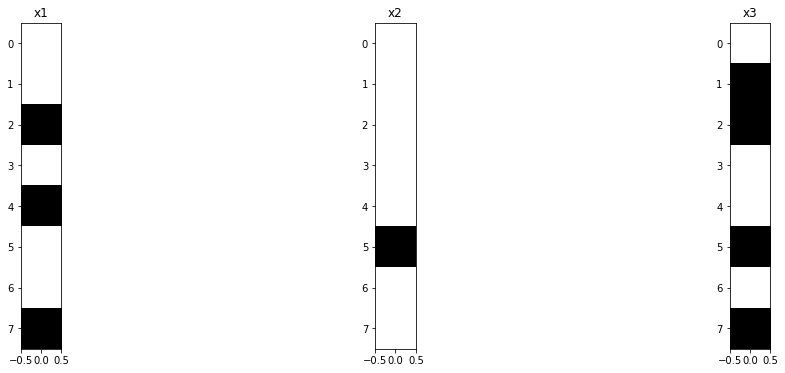

In [3]:
# Show input patterns
hopfield.show_patterns(X.T)

In [4]:
# Create Hopfield Network
hopnet = hopfield.Hopfield(np.shape(X)[0])

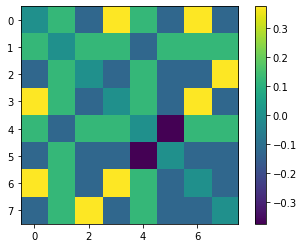

In [5]:
# Compute weight matrix
hopnet.train_W(X)
np.fill_diagonal(X @ X.T,0)
# Plot weights matrix
hopnet.plot_weights()

### Apply update rule to distorted patterns

In [6]:
# Define distorted patterns
x1d = np.array([[1,-1,1,-1,1,-1,-1,1]]) # one bit error
x2d = np.array([[1,1,-1,-1,-1,1,-1,-1]]) # two bit errors
x3d = np.array([[1,1,1,-1,1,1,-1,1]]) # two bit errors
Xd = np.append(x1d,np.append(x2d,x3d,axis=0),axis=0)

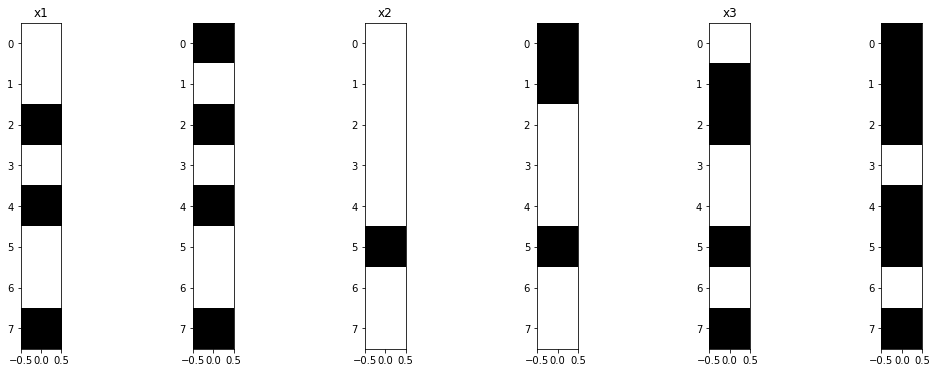

In [7]:
# Plot original and distorted patterns
hopfield.show_patterns_distorted(X.T,Xd.T)

In [8]:
# Asynchronous recall over distorted patterns
n_steps = 20
Xd_rec = np.zeros(np.shape(Xd))
n_patterns = np.shape(Xd)[0]
for i in range(n_patterns) :
    xs, energys = hopnet.asynchronous_recall(Xd[[i],:],n_steps)
    Xd_rec[[i],:] = xs[-1]

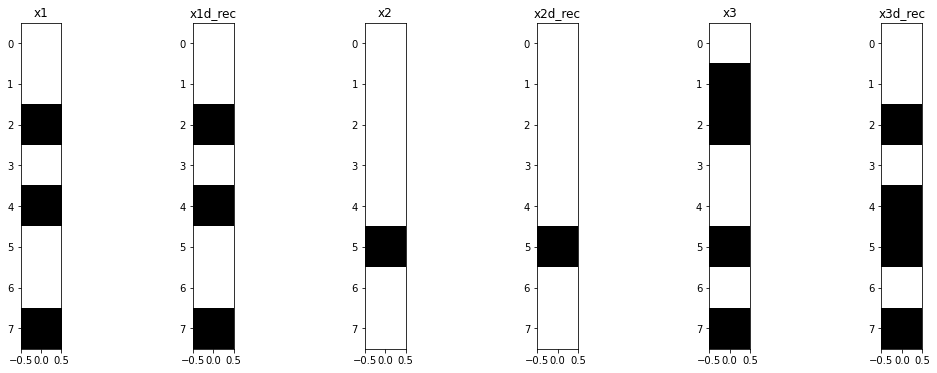

In [9]:
# Plot original and recovered distorted patterns
hopfield.show_patterns_distorted(X.T,Xd_rec.T,recovered=True)

### How many attractors are there in the network?